<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_09/04_a_mnist_transfer_effnet_bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Parameters
IMG_SIZE = 64
BATCH_SIZE = 8
AUTOTUNE = tf.data.AUTOTUNE

# Load MNIST using tf.data
(train_ds, test_ds), ds_info = tf.keras.datasets.mnist.load_data(), None

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Preprocessing function (grayscale to RGB, resize, normalize)
def preprocess(image, label):
    image = tf.expand_dims(image, -1)             # shape: [28,28,1]
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.image.grayscale_to_rgb(image)
    image = tf.cast(image, tf.float32) / 255.0     # normalize
    return image, label

In [4]:
# Create tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices(train_ds)
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices(test_ds)
test_ds = test_ds.map(preprocess, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [5]:
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,210 (1.55 MB)

 Trainable params: 407,210 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 237s 31ms/step - accuracy: 0.9317 - loss: 0.2280 - val_accuracy: 0.9796 - val_loss: 0.0628
Epoch 2/3
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 259s 31ms/step - accuracy: 0.9848 - loss: 0.0515 - val_accuracy: 0.9796 - val_loss: 0.0593
Epoch 3/3
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 261s 31ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9863 - val_loss: 0.0467


In [7]:
model.evaluate(test_ds)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9835 - loss: 0.0555


[0.0467270202934742, 0.986299991607666]

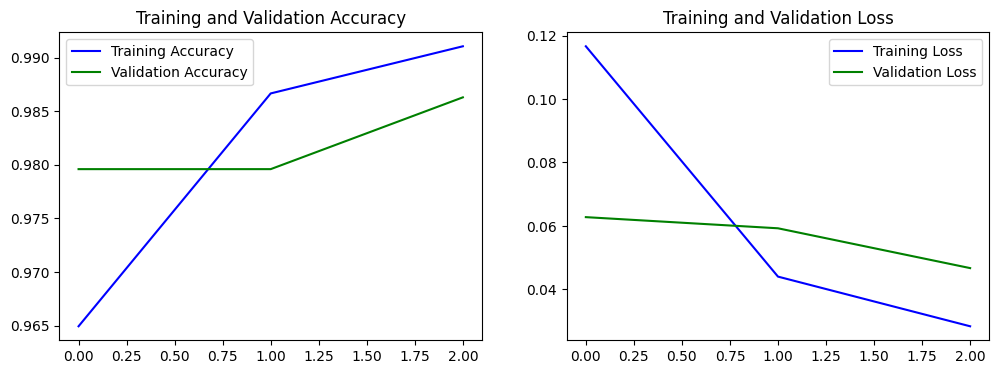

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


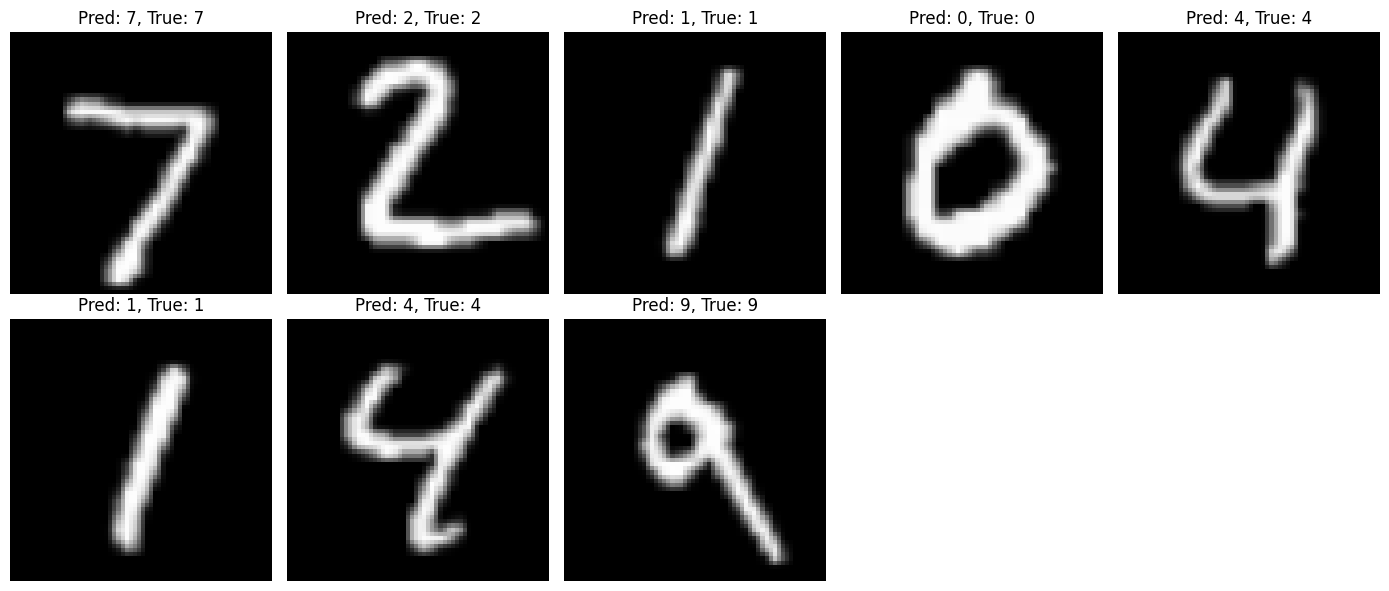

In [11]:
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions, axis=1)
    break

plt.figure(figsize=(14, 6))
for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    img = (images[i].numpy() * 255).astype("uint8")  # ✅ Fix here
    plt.imshow(img)
    plt.title(f"Pred: {pred_labels[i]}, True: {labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
